<center>Jaemin Son, 2018320192</center></br>

# The Algorithm

epoch 20, x1 -0.010599, x2 0.000000


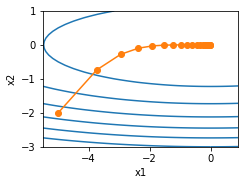

In [2]:
import sys
sys.path.insert(0, '..')

import d2l
import math
import torch

def rmsprop_2d(x1, x2, s1, s2):
    g1, g2, eps = 0.2 * x1, 4 * x2, 1e-6
    s1 = gamma * s1 + (1 - gamma) * g1 ** 2
    s2 = gamma * s2 + (1 - gamma) * g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2
eta, gamma = 0.4, 0.9
d2l.show_trace_2d(f_2d, d2l.train_2d(rmsprop_2d))

# Implementation from Scratch

In [3]:
def init_rmsprop_states():
    s_w = torch.zeros((features.shape[1], 1))
    s_b = torch.zeros(1)
    return (s_w, s_b)

def rmsprop(params, states, hyperparams):
    gamma, eps = hyperparams['gamma'], 1e-6
    for p, s in zip(params, states):
        s[:] = gamma * s + (1 - gamma) * p.grad**2
        p[:] -= hyperparams['lr'] * p.grad / (s + eps).sqrt()

# Concise Implementation

loss: 0.244, 0.008 sec/epoch


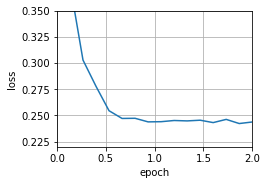

In [4]:
data_iter, feature_dim = d2l.get_data_ch10(batch_size=10)

d2l.train_ch10(torch.optim.RMSprop, {'lr': 0.01, 'gamma': 0.9}, data_iter, feature_dim)